In [41]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import fftpack


In [42]:
def samplingLoop(N, M, w, F):
    for i in range(N):
        for j in range(M):
            r2 = (i - N//2)**2 + (j - M//2)**2
            
            if r2 > round(N//2 * w)**2:
                F[i, j] = 0
    return F

In [43]:
def downsampling(I, m, filter_option):
    # Downsample the square image I by a factor of m
    N, M = I.shape
    
    # Apply ideal filter
    w = 1/m
    F = fftpack.fftshift(fftpack.fft2(I))
    
    if filter_option == 'FILTER_ON':
        F = samplingLoop(N, M, w, F)
    
    Idown = np.real(fftpack.ifft2(fftpack.ifftshift(F)))
    
    # Now downsample
    Idown = np.array(Image.fromarray(Idown).resize((N // m, M // m), Image.NEAREST))
    
    return Idown

In [44]:
def upsampling(I, m):
    # Upsample the square image I by a factor of m
    N, M = I.shape
    Iup = np.zeros((m*N, m*N))

    # Expand input image
    for i in range(N):
        for j in range(N):
            Iup[m*i, m*j] = I[i,j]
    
    # Ideal filter
    N, M = Iup.shape
    w = 1/m
    F = fftpack.fftshift(fftpack.fft2(Iup))

    F = samplingLoop(N, M, w, F)

    Iup = (m*m) * np.abs(fftpack.ifft2(fftpack.ifftshift(F)))

    return Iup

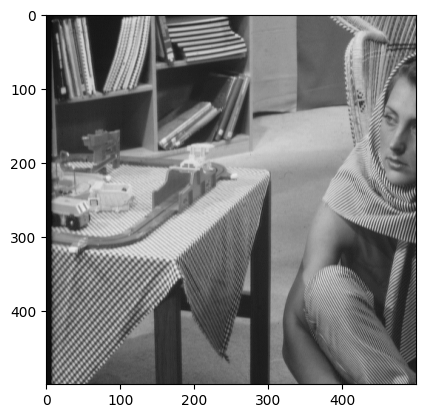

In [45]:
m = 2

f1 = np.array(Image.open('../assets/barbara.gif').convert('L'))
f1 = f1[:500, :500]

plt.figure()
plt.imshow(f1, cmap='gray', vmin=0, vmax=255)

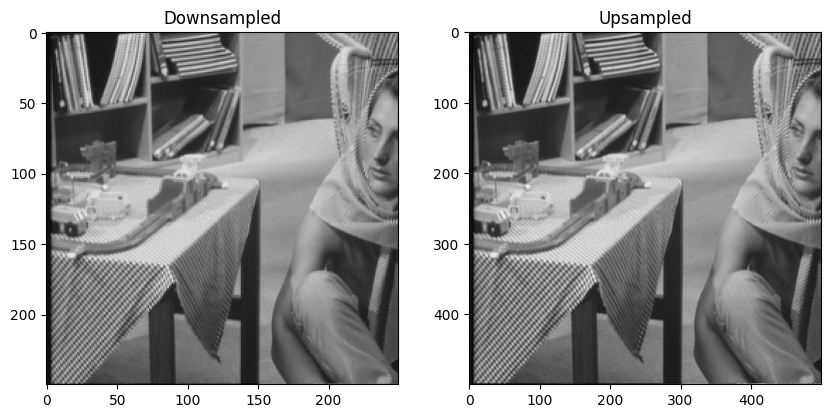

In [46]:
# Downsample
f2 = downsampling(f1, m, 'FILTER_ON')

# Crear una figura con dos subgráficos
plt.figure(figsize=(10, 5))  # El tamaño puede ajustarse según se necesite

# Primer subgráfico (Imagen de downsampling)
plt.subplot(1, 2, 1)
plt.imshow(f2, cmap='gray', vmin=0, vmax=255)
plt.title("Downsampled")

# Upsample
f3 = upsampling(f2, m)

# Segundo subgráfico (Imagen de upsampling)
plt.subplot(1, 2, 2)
plt.imshow(f3, cmap='gray', vmin=0, vmax=255)
plt.title("Upsampled")

# Mostrar las imágenes
plt.show()


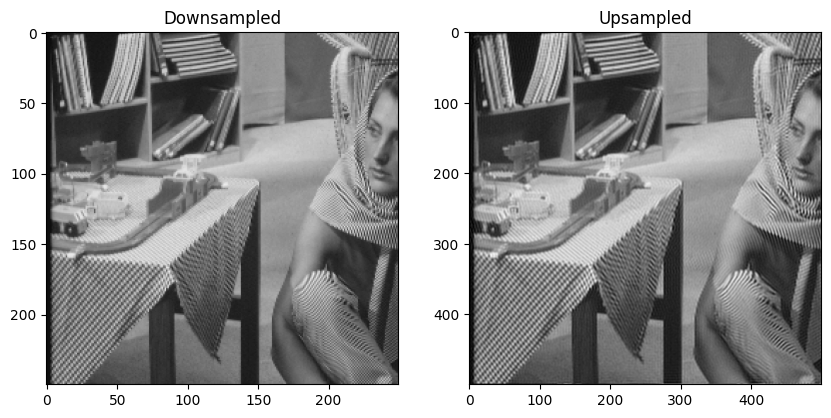

In [47]:
# Downsample
f2 = downsampling(f1, m, 'FILTER_OFF')

# Crear una figura con dos subgráficos
plt.figure(figsize=(10, 5))  # El tamaño puede ajustarse según se necesite

# Primer subgráfico (Imagen de downsampling)
plt.subplot(1, 2, 1)
plt.imshow(f2, cmap='gray', vmin=0, vmax=255)
plt.title("Downsampled")

# Upsample
f3 = upsampling(f2, m)

# Segundo subgráfico (Imagen de upsampling)
plt.subplot(1, 2, 2)
plt.imshow(f3, cmap='gray', vmin=0, vmax=255)
plt.title("Upsampled")

# Mostrar las imágenes
plt.show()


Se toma una imagen original de 500x500 pixeles que se puede pensar como una señal sobre un espacio de 2D resultado de un muestreo espacial con frecuencia de muestreo desconocida. 

Se plantean dos casos donde se hace un downsampling con factor 2, es decir que se reduce la frecuencia de muestreo espacial a la mitad, esto lo que hace es remover la mitad de las muestras de la imagen.

En el primer caso se aplica el filtro pasabajo previo al downsampling evitando asi el efecto de aliasing pero generando una perdida de informacion de alta frecuencia de la informacion original.

En el segundo caso no se aplica el filtro pasabajo entonces al momento de ejecutar el downsamplig se provoca el efecto de aliasing.

Finalmente en ambos casos se aplica el upsampling que busca aumentar la frecuencia de muestreo de la señal.